## Example of Linear Regression on Vehicle Dataset ... 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GabbySuwichaya/Statistical-Learning-EE575/blob/master/Tutorial1/vehicle_linear_regression.ipynb)

The topics covered in this exercise are: 

- [Data Visualization and Preprocessing](#data-visualization--preprocessing)
- [Data separation for Single Feature --- Training and Testing](#separate-training-and-testing-for-signle-feature)  
- [Training and Inference](#perform-training-and-inference)   
- [Evaluations](#evaluations)   

** Denotes the parts that you have to fill up with correct Python commands...  

In [1]:
#! pip install numpy pandas tqdm matplotlib statsmodels
! pip install -q kaggle

Download data from Kreggle website:

In [2]:
! kaggle datasets download -d nehalbirla/vehicle-dataset-from-cardekho

100%|█████████████████████████████████████████| 292k/292k [00:00<00:00, 415kB/s]
100%|█████████████████████████████████████████| 292k/292k [00:00<00:00, 415kB/s]


In [9]:
import zipfile

foldername = "vehicle-dataset"

with zipfile.ZipFile("vehicle-dataset-from-cardekho.zip","r") as zip_ref:
    zip_ref.extractall(foldername)

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## Data Visualization & Preprocessing

Dataframe contains 9 attributes: Car_name, Year, Selling_Price, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner

In [11]:
df = pd.read_csv('%s/car data.csv' % foldername)
df.iloc[:4]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0


To check the statistics for the non-text attributes

In [12]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Encode target labels with value between 0 and n_classes-1.

In [13]:
print("Raw value before Encoding ...")
#print(np.unique(df['Car_Name'].values))
#print(np.unique(df['Transmission'].values))
#print(np.unique(df['Fuel_Type'].values))
#print(np.unique(df['Seller_Type'].values))

Raw value before Encoding ...


In [ ]:
df[['Car_Name', 'Fuel_Type','Seller_Type','Transmission']] = df.loc[:,['Car_Name', 'Fuel_Type','Seller_Type','Transmission']].apply(LabelEncoder().fit_transform)
print("After Encoding: ")
print(np.unique(df['Car_Name'].values))
print(np.unique(df['Transmission'].values))
print(np.unique(df['Fuel_Type'].values))
print(np.unique(df['Seller_Type'].values))

Summary of each attributes:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    int64  
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 21.3 KB


## Separate training and testing for Signle Feature

In [16]:
from sklearn.model_selection import train_test_split

# Define features and target variable

X = df['Present_Price'].values.reshape(-1,1)
y = df['Selling_Price'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [17]:
min_max_scaler_X = MinMaxScaler()
X_train        = min_max_scaler_X.fit_transform(X_train)
X_test         = min_max_scaler_X.transform(X_test)

In [18]:
min_max_scaler_Y = MinMaxScaler()
y_train        = min_max_scaler_Y.fit_transform(y_train) 

## Perform Training and Inference

In [19]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred    = regressor.predict(X_test)

### Evaluations

In [20]:
y_pred = min_max_scaler_Y.inverse_transform(y_pred)

In [23]:
from sklearn import metrics

print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2score:",metrics.r2_score(y_test,y_pred))

MAE: 1.553899315736052
MSE: 5.244314257324024
RMSE: 2.2900467805972924
R2score: 0.7925288537728552


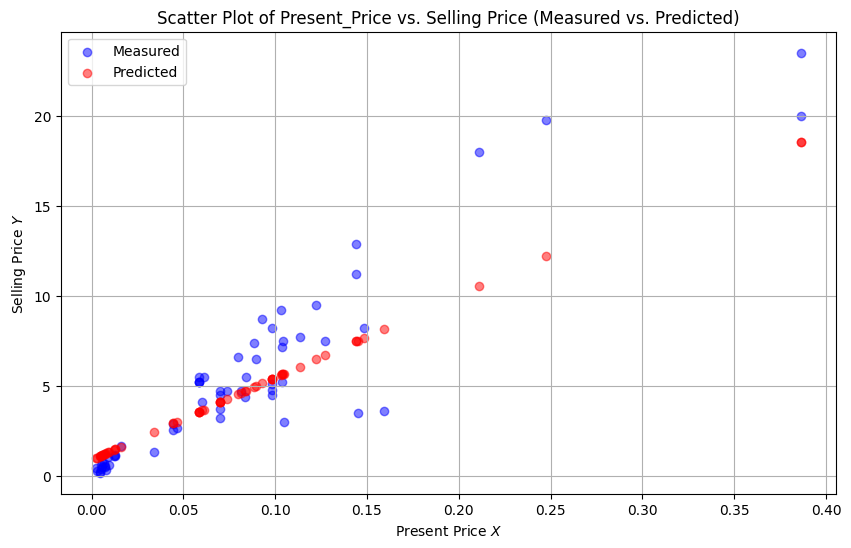

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Measured', c='blue')
plt.scatter(X_test, y_pred, alpha=0.5, label='Predicted', c='red')
plt.xlabel("Present Price $X$")
plt.ylabel("Selling Price $Y$")
plt.title("Scatter Plot of Present_Price vs. Selling Price (Measured vs. Predicted)")
plt.legend()
plt.grid(True)
plt.show()